           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_liv

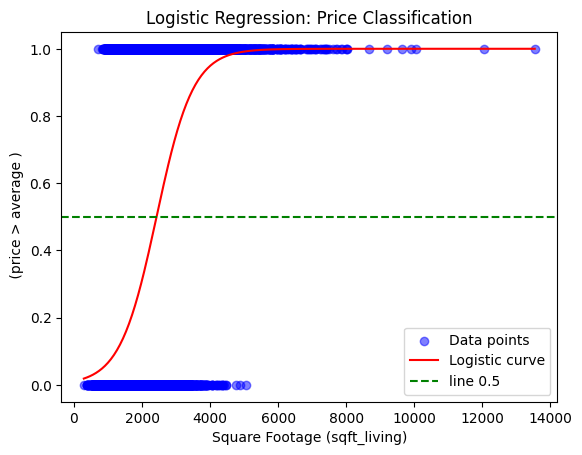

Model accuracy: 0.77


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load the CSV data


data = pd.read_csv('home_data.csv')
print(data.head())
# Prepare the data

price = data['price'].mean()
data['price_class'] = (data['price'] > price).astype(int)


X = data[['sqft_living']].values 
y = data['price_class'].values    

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1] 

# Plot the data and decision boundary
plt.scatter(X, y, color='blue', label='data points', alpha=0.5)
plt.plot(x_range, y_prob, color='red', label='Logistic regression')
plt.axhline(0.5, color='green', linestyle='--', label='line 0.5')
plt.xlabel('Squre foot (sqft_living)')
plt.ylabel('price > average')
plt.title('Logistic Regression: Prices range')
plt.legend()
plt.show()

# Print model accuracy
accuracy = model.score(X, y)
print(f"Model accuracy: {accuracy:.2f}")